In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("survey-lung-cancer.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    object
 3   YELLOW_FINGERS         309 non-null    object
 4   ANXIETY                309 non-null    object
 5   PEER_PRESSURE          309 non-null    object
 6   CHRONIC DISEASE        309 non-null    object
 7   FATIGUE                309 non-null    object
 8   ALLERGY                309 non-null    object
 9   WHEEZING               309 non-null    object
 10  ALCOHOL CONSUMING      309 non-null    object
 11  COUGHING               309 non-null    object
 12  SHORTNESS OF BREATH    309 non-null    object
 13  SWALLOWING DIFFICULTY  309 non-null    object
 14  CHEST PAIN             309 non-null    object
 15  LUNG_CANCER            

In [5]:
df.describe()

,AGE
count,309.000000
mean,62.673139
std,8.210301
min,21.000000
25%,57.000000
50%,62.000000
75%,69.000000
max,87.000000


In [6]:

df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [7]:

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,M,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,F,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,M,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,F,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO


In [ ]:

#Data Cleaning and Feature Engineering

In [8]:

df.isna().any()
     

GENDER                   False
AGE                      False
SMOKING                  False
YELLOW_FINGERS           False
ANXIETY                  False
PEER_PRESSURE            False
CHRONIC DISEASE          False
FATIGUE                  False
ALLERGY                  False
WHEEZING                 False
ALCOHOL CONSUMING        False
COUGHING                 False
SHORTNESS OF BREATH      False
SWALLOWING DIFFICULTY    False
CHEST PAIN               False
LUNG_CANCER              False
dtype: bool

In [ ]:
#There are no null values here

In [9]:

#Patient having LUNG_CANCER = 2 & Patient not having LUNG_CANCER = 1
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace('YES','2')
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace('NO','1')

<Axes: >

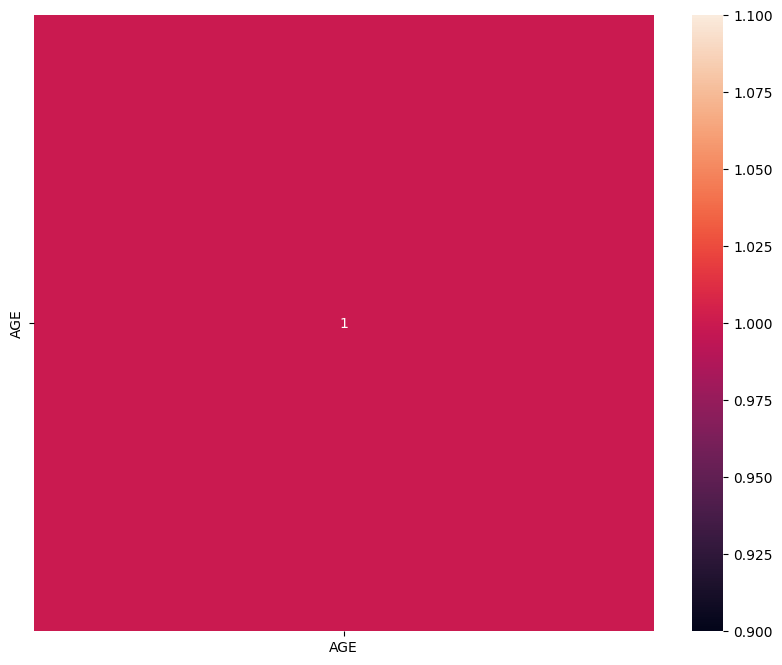

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only = True),annot=True)

In [30]:
#Which is the most common age of cancer patients
common_age = df['AGE'].value_counts()
common_age.head()

AGE
64    20
56    19
63    19
62    18
60    17
Name: count, dtype: int64

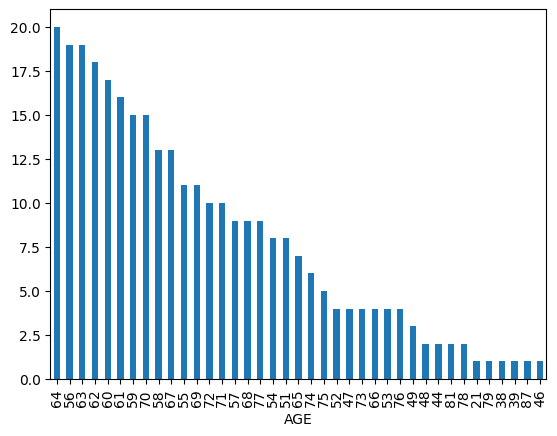

In [31]:
common_age.plot(kind='bar')
plt.show()

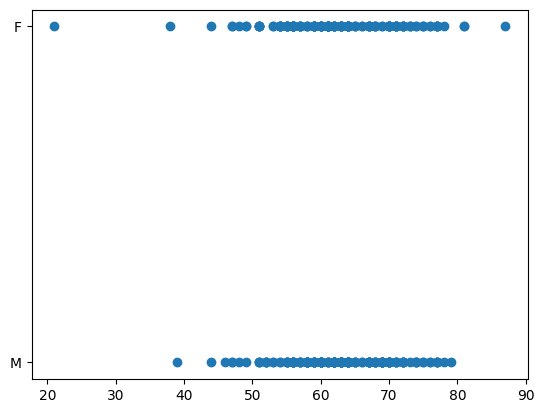

In [32]:
plt.scatter(df.AGE,df.GENDER)

In [ ]:

# It seems like people between age of 50 to 75 are most prone to having lung cancer.

In [ ]:
#What is the main reason among all to cause cancer i.e. relationship between smoking,anxiety,alcohol consumption

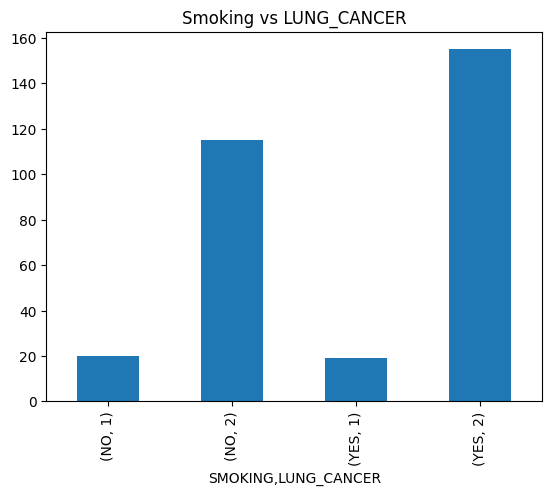

In [33]:
#Relation between smoking and lung cancer
df.groupby(['SMOKING','LUNG_CANCER']).SMOKING.count().plot(kind='bar')
plt.title('Smoking vs LUNG_CANCER')
plt.show()

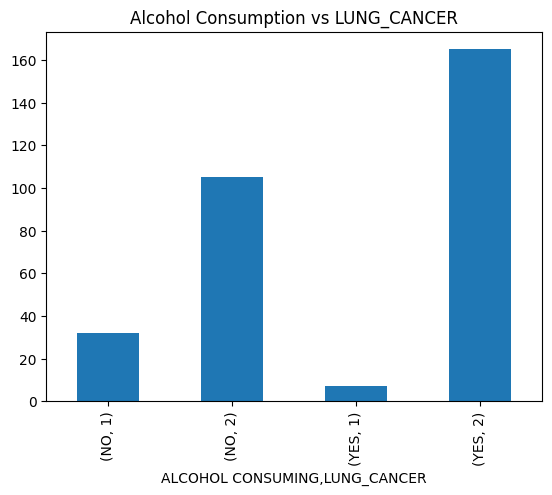

In [34]:

#Relation between alcohol consumption and lung cancer
df.groupby(['ALCOHOL CONSUMING','LUNG_CANCER']).SMOKING.count().plot(kind='bar')
plt.title('Alcohol Consumption vs LUNG_CANCER')
plt.show()

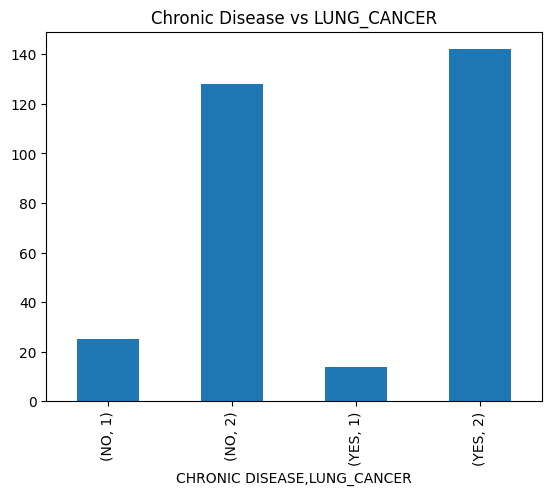

In [35]:
#Relation between Chronic Disease and LUNG_CANCER
df.groupby(['CHRONIC DISEASE','LUNG_CANCER']).SMOKING.count().plot(kind='bar')
plt.title('Chronic Disease vs LUNG_CANCER')
plt.show()

In [ ]:
#In the provided bar chart, where the value 1 denotes "NO" and 2 signifies "Yes," the data suggests that individuals marked (2,1) are smokers but
#do not exhibit signs of lung cancer. Strikingly, contrary to expectations that smoking and alcohol consumption might be significant factors leading
#to lung cancer, they appear to play a contributory role. Notably, the final bar at coordinates (2,2) illustrates the percentage of individuals who
#both smoke and consume alcohol and also have been diagnosed with cancer.

In [ ]:
#Gender-Wise Comparison For LUNG_CANCER

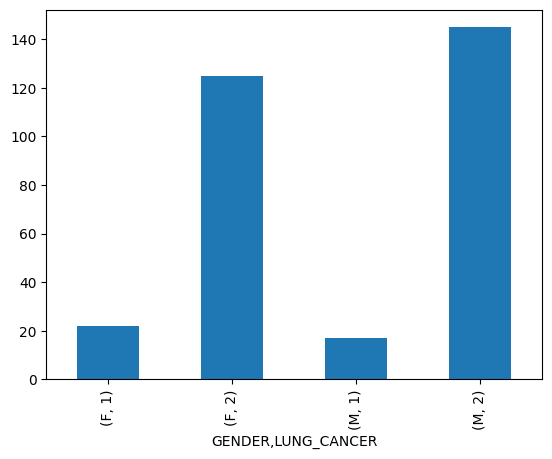

In [36]:
df.groupby(['GENDER','LUNG_CANCER']).LUNG_CANCER.count().plot(kind='bar')
plt.show()

In [ ]:

#From the Above Analysis it is clear that Men are prone to having lung cancer
# than women. Men indulge into works that directly affect their respiratory system.